# Q1 -- To compare the tendency of one sponsor/sponsor_type to post pro messages for the candidates they support and con messages for the candidates they don’t support.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


AOT = pd.read_csv('Airings_on_TV.csv')
UAA = pd.read_csv('Unique_Ads_Archived.csv')

AOT

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375345,475690,542,KWWL,"Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa",Dateline NBC,news,2016-01-09 02:09:27 UTC,2016-01-09 02:09:57 UTC,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,Rand Paul for President,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54
375346,475691,542,WYFF,"Greenville-Spartanburg, SC/Asheville-Anderson, NC",Dateline NBC,news,2016-01-10 01:55:06 UTC,2016-01-10 01:55:36 UTC,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,Rand Paul for President,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54
375347,475692,542,WIS,"Columbia, SC",Dateline NBC,news,2016-01-10 01:23:51 UTC,2016-01-10 01:24:21 UTC,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,Rand Paul for President,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54
375348,475693,542,KTIV,"Sioux City, Iowa",Dateline NBC,news,2016-01-16 03:35:23 UTC,2016-01-16 03:35:53 UTC,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,Rand Paul for President,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54


## A. DATA CLEANING

### 1. Columns to be filtered (drop rows):
- `sponsor` and `sponsor_types`: drop empty and unknown values. 

In [2]:
# getting rid of na sponsors
print('na count for sponsors (before):', AOT['sponsors'].isna().sum())
AOT = AOT[~AOT['sponsors'].isna()]
print('na count for sponsors (after):', AOT['sponsors'].isna().sum())

AOT.sort_values(['sponsors'], ascending=True)

na count for sponsors (before): 1162
na count for sponsors (after): 0


,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created
127574,162311,858,WNYW,"New York City, NY",Fox5 Special Street Soldiers,not news,2016-01-10 03:47:47 UTC,2016-01-10 03:49:32 UTC,PolAd_BenCarson_ae6yr,https://archive.org/embed/PolAd_BenCarson_ae6yr,2016 Cmte,Super PAC,PRES,2016.0,"Job Accomplishments, Bipartisanship",Ben Carson,campaign,unknown,2016-09-12 14:57:59
348907,448568,8052,WISN,"Milwaukee, WI",Steve Harvey,not news,2016-11-07 21:09:57 UTC,2016-11-07 21:10:29 UTC,PolAd_HillaryClinton_rj13k,https://archive.org/embed/PolAd_HillaryClinton...,45 Committee,Non Profit,PRES,2016.0,"Poverty, Health Care, Candidate Biography, Ter...",Hillary Clinton,campaign,con,2016-11-09 01:40:21
356395,456123,8214,WTXF,"Philadelphia, PA",Fox Morning News at 4A,news,2016-10-28 08:15:38 UTC,2016-10-28 08:16:08 UTC,PolAd_Iran_Nuclear_ForeignPolicy_xl32g,https://archive.org/embed/PolAd_Iran_Nuclear_F...,45 Committee,Non Profit,NaN,NaN,"Iran, Nuclear, Foreign Policy, Terrorism, Iraq",NaN,campaign,unknown,2016-11-09 11:40:10
356394,456122,8214,FOXNEWSW,"San Francisco-Oakland-San Jose, CA",FOX Friends,news,2016-10-20 10:16:14 UTC,2016-10-20 10:16:44 UTC,PolAd_Iran_Nuclear_ForeignPolicy_xl32g,https://archive.org/embed/PolAd_Iran_Nuclear_F...,45 Committee,Non Profit,NaN,NaN,"Iran, Nuclear, Foreign Policy, Terrorism, Iraq",NaN,campaign,unknown,2016-11-09 11:40:10
356393,456121,8214,WPVI,"Philadelphia, PA",Action News 11pm,news,2016-10-27 06:01:02 UTC,2016-10-27 06:01:32 UTC,PolAd_Iran_Nuclear_ForeignPolicy_xl32g,https://archive.org/embed/PolAd_Iran_Nuclear_F...,45 Committee,Non Profit,NaN,NaN,"Iran, Nuclear, Foreign Policy, Terrorism, Iraq",NaN,campaign,unknown,2016-11-09 11:40:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235475,302025,6937,KDTV,"San Francisco-Oakland-San Jose, CA",Despertar contigo,not news,2016-10-11 03:38:27 UTC,2016-10-11 03:38:57 UTC,PolAd_DonaldTrump_HillaryClinton_fax4k,https://archive.org/embed/PolAd_DonaldTrump_Hi...,iAmerica Action,Non Profit,PRES,2016.0,"Immigration, Civil Rights, Legal Issues","Donald Trump, Hillary Clinton",campaign,mixed,2016-10-11 05:40:09
240479,308628,6937,KSTS,"San Francisco-Oakland-San Jose, CA",Al Rojo Vivo con Maria Celeste,not news,2016-10-13 23:16:25 UTC,2016-10-13 23:16:55 UTC,PolAd_DonaldTrump_HillaryClinton_fax4k,https://archive.org/embed/PolAd_DonaldTrump_Hi...,iAmerica Action,Non Profit,PRES,2016.0,"Immigration, Civil Rights, Legal Issues","Donald Trump, Hillary Clinton",campaign,mixed,2016-10-14 17:39:59
235364,301897,6937,WUVP,"Philadelphia, PA",El color de la pasion,not news,2016-10-11 02:21:44 UTC,2016-10-11 02:22:14 UTC,PolAd_DonaldTrump_HillaryClinton_fax4k,https://archive.org/embed/PolAd_DonaldTrump_Hi...,iAmerica Action,Non Profit,PRES,2016.0,"Immigration, Civil Rights, Legal Issues","Donald Trump, Hillary Clinton",campaign,mixed,2016-10-11 04:40:11
276071,375038,6937,KSTS,"San Francisco-Oakland-San Jose, CA",Senora Acero 3 La Coyote,not news,2016-10-18 08:16:08 UTC,2016-10-18 08:16:38 UTC,PolAd_DonaldTrump_HillaryClinton_fax4k,https://archive.org/embed/PolAd_DonaldTrump_Hi...,iAmerica Action,Non Profit,PRES,2016.0,"Immigration, Civil Rights, Legal Issues","Donald Trump, Hillary Clinton",campaign,mixed,2016-10-18 09:40:07


In [3]:
# check na for sponsor_tpyes
print('na count for sponsor_types:', AOT['sponsor_types'].isna().sum())
AOT['sponsor_types'].unique()

na count for sponsor_types: 0


array(['Multiple', 'Hybrid Super PAC', 'Super PAC', 'Candidate Committee',
       'PAC', 'Unknown', 'Non Profit', 'Trade Association',
       'Joint Fundraising Committee', 'Corporation', '527'], dtype=object)

- Investigate Unknown`sponsor_types`.

In [4]:
sponsors_unknown_type = AOT[AOT['sponsor_types'] == 'Unknown']['sponsors'].unique()
print('The sponsors with unknown types:\n', sponsors_unknown_type)
print('\nThese sponsors are only categorized as Unknown:', \
      list(AOT[AOT['sponsors'].isin(sponsors_unknown_type)]['sponsor_types'].unique()) == ['Unknown'])
print('\nNumber of ads with unknown sponsor_types:', AOT[AOT['sponsor_types'] == 'Unknown'].size)

The sponsors with unknown types:
 ['Californians Against the Misleading Rx Measure'
 'Arizona Grassroots Action PAC' 'Donald J. Trump For President'
 "American Fed'n of St/Cnty/Munic Employees" 'U.S. Chamber of Commerce'
 'Bernie Sanders for President' 'Ready for Hillary' 'ESA Fund'
 'National Association of Broadcasters'
 'The Campaign To Regulate Marijuana Like Alcohol' 'Yes on 4'
 'Arizonans for Responsible Drug Policy' 'Yes on 64'
 'People United for Medical Marijuana'
 'Coalition to Regulate Marijuana Like Alcohol' 'Internet Archive'
 'Drug Free Florida Committee' "Protecting Nevada's Children"
 'NRA Nevadans for Freedom'
 'Campaign for a Safe and Healthy Massachusetts'
 'The Coalition to Regulate Marijuana Like Alcohol'
 'North Carolina Democratic Party' 'Friends of Gerald Daugherty'
 'No On Prop 64' 'Thomas Peterffy']

These sponsors are only categorized as Unknown: True

Number of ads with unknown sponsor_types: 430730


We will separate the dataframe without Unknown `sponsor_types` because those sponsors may be useful when analyzing by `sponsors`. 

In [5]:
# store a dataframe without unknown sponsor type
wo_unknown_sponsors = AOT[AOT['sponsor_types'] != 'Unknown']
wo_unknown_sponsors['sponsor_types'].unique()

array(['Multiple', 'Hybrid Super PAC', 'Super PAC', 'Candidate Committee',
       'PAC', 'Non Profit', 'Trade Association',
       'Joint Fundraising Committee', 'Corporation', '527'], dtype=object)

In [6]:
print('Original dataframe size:\t\t\t', AOT.size)
print('Size of dataframe WITHOUT unknown sponsor type:\t', wo_unknown_sponsors.size)
print('Number of ads WITH ONLY unknown sponsor_types:\t', AOT.size - wo_unknown_sponsors.size)

Original dataframe size:			 7109572
Size of dataframe WITHOUT unknown sponsor type:	 6678842
Number of ads WITH ONLY unknown sponsor_types:	 430730


- `cycle`: drop the empty (non-2016) cycle. 

In [7]:
print('na count for cycle (before):', AOT['cycle'].isna().sum())
print('nunique()\t', AOT['cycle'].unique())
AOT = AOT[~AOT['cycle'].isna()]
AOT['cycle'] = AOT['cycle'].astype(int)
print('\nna count for cycle (after):', AOT['cycle'].isna().sum())
print('nunique()\t', AOT['cycle'].unique())
print('dtype()\t\t', AOT['cycle'].dtype)

na count for cycle (before): 29101
nunique()	 [2016.   nan]

na count for cycle (after): 0
nunique()	 [2016]
dtype()		 int64


In [8]:
print('na count for cycle (before):', wo_unknown_sponsors['cycle'].isna().sum())
print('nunique()\t', wo_unknown_sponsors['cycle'].unique())
wo_unknown_sponsors = wo_unknown_sponsors[~wo_unknown_sponsors['cycle'].isna()]
wo_unknown_sponsors['cycle'] = wo_unknown_sponsors['cycle'].astype(int)
print('\nna count for cycle (after):', wo_unknown_sponsors['cycle'].isna().sum())
print('nunique()\t', wo_unknown_sponsors['cycle'].unique())
print('dtype()\t\t', wo_unknown_sponsors['cycle'].dtype)

na count for cycle (before): 19775
nunique()	 [2016.   nan]

na count for cycle (after): 0
nunique()	 [2016]
dtype()		 int64


- `message`: drop unknown ones and unify the naming for **mixed** and **mix** as **mix**. 

In [9]:
print('unique message for message (before):', AOT['message'].unique())
AOT['message'].replace('mixed','mix', inplace=True)
AOT = AOT[AOT['message'] != 'unknown']
AOT = AOT[AOT['message'] != 'mix']
print('unique message for message (after):', AOT['message'].unique())

unique message for message (before): ['pro' 'con' 'mixed' 'unknown' 'mix']
unique message for message (after): ['pro' 'con']


In [10]:
print('unique message for message (before):', wo_unknown_sponsors['message'].unique())
wo_unknown_sponsors['message'].replace('mixed','mix', inplace=True)
wo_unknown_sponsors = wo_unknown_sponsors[wo_unknown_sponsors['message'] != 'unknown']
wo_unknown_sponsors = wo_unknown_sponsors[wo_unknown_sponsors['message'] != 'mix']
print('unique message for message (after):', wo_unknown_sponsors['message'].unique())

unique message for message (before): ['pro' 'con' 'mixed' 'unknown' 'mix']
unique message for message (after): ['pro' 'con']


- `race`: only consider `PRES`. 

In [11]:
print('unique message for race (before):', AOT['race'].unique())
AOT = AOT[AOT['race'] == 'PRES']
print('unique message for race (after):', AOT['race'].unique())

unique message for race (before): ['PRES' 'NHS1' 'PAS1' 'AZS1' 'AZ05' 'WIS2' 'INS2' 'WI01' 'CAS1' 'PA08'
 'MD08' 'MDS2' 'MD04' 'PA02' 'KS01' 'IAS1' 'NCS2' 'NVS2' 'OHS2' 'COS1'
 'FLS2' 'OH08' 'NC02' 'NC11' 'NJ03' 'KYS2']
unique message for race (after): ['PRES']


In [12]:
print('unique message for race (before):', wo_unknown_sponsors['race'].unique())
wo_unknown_sponsors = wo_unknown_sponsors[wo_unknown_sponsors['race'] == 'PRES']
print('unique message for race (after):', wo_unknown_sponsors['race'].unique())

unique message for race (before): ['PRES' 'NHS1' 'PAS1' 'AZS1' 'AZ05' 'WIS2' 'INS2' 'WI01' 'CAS1' 'PA08'
 'MD08' 'MDS2' 'MD04' 'PA02' 'KS01' 'IAS1' 'NCS2' 'NVS2' 'OHS2' 'COS1'
 'FLS2' 'OH08' 'NC02' 'NC11' 'NJ03' 'KYS2']
unique message for race (after): ['PRES']


- Check data cleaning performance.

In [13]:
for col in ['sponsor_types', 'cycle', 'message', 'race']:
    print(col,end=" --> sum: ")
    print((AOT[col].value_counts().sum()))
    print(AOT[col].value_counts())
    print('\n')

sponsor_types --> sum: 131720
Multiple                       53357
Candidate Committee            33475
Super PAC                      33047
Unknown                         8543
Hybrid Super PAC                1346
PAC                             1089
Non Profit                       833
Joint Fundraising Committee       29
Corporation                        1
Name: sponsor_types, dtype: int64


cycle --> sum: 131720
2016    131720
Name: cycle, dtype: int64


message --> sum: 131720
pro    70092
con    61628
Name: message, dtype: int64


race --> sum: 131720
PRES    131720
Name: race, dtype: int64




In [14]:
for col in ['sponsor_types', 'cycle', 'message', 'race']:
    print(col,end=" --> sum: ")
    print((wo_unknown_sponsors[col].value_counts().sum()))
    print(wo_unknown_sponsors[col].value_counts())
    print('\n')

sponsor_types --> sum: 123177
Multiple                       53357
Candidate Committee            33475
Super PAC                      33047
Hybrid Super PAC                1346
PAC                             1089
Non Profit                       833
Joint Fundraising Committee       29
Corporation                        1
Name: sponsor_types, dtype: int64


cycle --> sum: 123177
2016    123177
Name: cycle, dtype: int64


message --> sum: 123177
pro    62261
con    60916
Name: message, dtype: int64


race --> sum: 123177
PRES    123177
Name: race, dtype: int64




### 2. Columns to be dropped:
- Primary: `id`, `wp_identifier`, `network`, `archive_id`, `embed_url`, `subjects`, `type`, `date_created`
- Optional: `location`, `program`, `program_type`, `race`, `cycle`

In [15]:
print("Columns before cleaning:", list(AOT.columns))

# drop the primary
AOT = AOT.drop(['id', 'wp_identifier', 'network', 'archive_id', 'embed_url', 'subjects', 'type', 'date_created'], axis=1)
# also drop the ones won't be used in the questions
AOT = AOT.drop(['location', 'program', 'program_type', 'sponsor_types', 'race', 'cycle'], axis=1)

print("Columns after cleaning:", list(AOT.columns))

Columns before cleaning: ['id', 'wp_identifier', 'network', 'location', 'program', 'program_type', 'start_time', 'end_time', 'archive_id', 'embed_url', 'sponsors', 'sponsor_types', 'race', 'cycle', 'subjects', 'candidates', 'type', 'message', 'date_created']
Columns after cleaning: ['start_time', 'end_time', 'sponsors', 'candidates', 'message']


In [16]:
print("Columns before cleaning:", list(wo_unknown_sponsors.columns))

# drop the primary
wo_unknown_sponsors = wo_unknown_sponsors.drop(['id', 'wp_identifier', 'network', 'archive_id', 'embed_url', 'subjects', 'type', 'date_created'], axis=1)
# also drop the ones won't be used in the questions
wo_unknown_sponsors = wo_unknown_sponsors.drop(['location', 'program', 'program_type', 'sponsors', 'race', 'cycle'], axis=1)

print("Columns after cleaning:", list(wo_unknown_sponsors.columns))

Columns before cleaning: ['id', 'wp_identifier', 'network', 'location', 'program', 'program_type', 'start_time', 'end_time', 'archive_id', 'embed_url', 'sponsors', 'sponsor_types', 'race', 'cycle', 'subjects', 'candidates', 'type', 'message', 'date_created']
Columns after cleaning: ['start_time', 'end_time', 'sponsor_types', 'candidates', 'message']


### 3. Columns to be created -- `air_secs`:
- use `pd.to_datetime()` to convert time columns to datatime. 
- create the column `air_sec` by subtracting the end time by the start time

In [17]:
AOT['start_time'] = pd.to_datetime(AOT['start_time'])
AOT['end_time'] = pd.to_datetime(AOT['end_time'])
AOT['air_secs'] = (AOT['end_time'] - AOT['start_time']).dt.total_seconds()
print(AOT['air_secs'].unique())
AOT

[ 30.  93.  36.  89.  57.  80.  15.  70. 119.  68.  42.  43.  38.  45.
  86.  69.  81.  59. 105. 103.  88.  19.  72.  76.  61.  90.  78.  53.
  32.  60.  29.  47.  71.  31.  63. 125.  37. 102. 137.  77.  91. 235.
 195. 163.  17.  34. 180.  62. 121.  85. 300.  14.  48.  55.  56. 126.
 236. 124.  84.  66.  67.  54.  96.  39. 130.  35.  28.  16.  44.  50.
  73.  41.  33.  87.  65. 184.  97. 122.  20. 140. 161.  18.  40.  83.
 120.  75.  27.  58. 116.  64.  49. 216.]


,start_time,end_time,sponsors,candidates,message,air_secs
0,2016-09-09 00:12:59+00:00,2016-09-09 00:13:29+00:00,Hillary for America,Hillary Clinton,pro,30.0
1,2016-09-06 21:58:25+00:00,2016-09-06 21:58:55+00:00,Hillary for America,Hillary Clinton,pro,30.0
2,2016-09-04 16:24:25+00:00,2016-09-04 16:24:55+00:00,Hillary for America,Hillary Clinton,pro,30.0
3,2016-08-30 17:59:20+00:00,2016-08-30 17:59:50+00:00,Hillary for America,Hillary Clinton,pro,30.0
4,2016-09-06 07:02:22+00:00,2016-09-06 07:02:52+00:00,Hillary for America,Hillary Clinton,pro,30.0
...,...,...,...,...,...,...
375345,2016-01-09 02:09:27+00:00,2016-01-09 02:09:57+00:00,Rand Paul for President,Rand Paul,pro,30.0
375346,2016-01-10 01:55:06+00:00,2016-01-10 01:55:36+00:00,Rand Paul for President,Rand Paul,pro,30.0
375347,2016-01-10 01:23:51+00:00,2016-01-10 01:24:21+00:00,Rand Paul for President,Rand Paul,pro,30.0
375348,2016-01-16 03:35:23+00:00,2016-01-16 03:35:53+00:00,Rand Paul for President,Rand Paul,pro,30.0


In [18]:
wo_unknown_sponsors['start_time'] = pd.to_datetime(wo_unknown_sponsors['start_time'])
wo_unknown_sponsors['end_time'] = pd.to_datetime(wo_unknown_sponsors['end_time'])
wo_unknown_sponsors['air_secs'] = (wo_unknown_sponsors['end_time'] - wo_unknown_sponsors['start_time']).dt.total_seconds()
print(wo_unknown_sponsors['air_secs'].unique())
wo_unknown_sponsors

[ 30.  93.  36.  89.  57.  80.  15.  70. 119.  68.  42.  43.  38.  45.
  86.  69.  81.  59. 105. 103.  88.  19.  72.  76.  61.  90.  78.  53.
  32.  60.  29.  47.  71.  31.  63. 125.  37. 102. 137.  77.  91. 235.
 195. 163.  17.  34. 180.  62. 121.  85. 300.  14.  48.  55.  56. 126.
 236.  66.  67.  54.  96. 130.  35.  28.  16.  73.  41.  33.  87.  65.
  50. 184.  97. 122.  20. 140. 161.  18.  40.  83. 124. 120.  75.  27.
  58. 116.  64.  49. 216.]


,start_time,end_time,sponsor_types,candidates,message,air_secs
0,2016-09-09 00:12:59+00:00,2016-09-09 00:13:29+00:00,Multiple,Hillary Clinton,pro,30.0
1,2016-09-06 21:58:25+00:00,2016-09-06 21:58:55+00:00,Multiple,Hillary Clinton,pro,30.0
2,2016-09-04 16:24:25+00:00,2016-09-04 16:24:55+00:00,Multiple,Hillary Clinton,pro,30.0
3,2016-08-30 17:59:20+00:00,2016-08-30 17:59:50+00:00,Multiple,Hillary Clinton,pro,30.0
4,2016-09-06 07:02:22+00:00,2016-09-06 07:02:52+00:00,Multiple,Hillary Clinton,pro,30.0
...,...,...,...,...,...,...
375345,2016-01-09 02:09:27+00:00,2016-01-09 02:09:57+00:00,Candidate Committee,Rand Paul,pro,30.0
375346,2016-01-10 01:55:06+00:00,2016-01-10 01:55:36+00:00,Candidate Committee,Rand Paul,pro,30.0
375347,2016-01-10 01:23:51+00:00,2016-01-10 01:24:21+00:00,Candidate Committee,Rand Paul,pro,30.0
375348,2016-01-16 03:35:23+00:00,2016-01-16 03:35:53+00:00,Candidate Committee,Rand Paul,pro,30.0


## B. ANSWERING QUESTIONS

### To compare the strategy of one `sponsor`/`sponsor_type` to post pro `messages` for the candidates they support and con `messages` for the candidates they don’t support. 
#### - Which `sponsor`/`sponsor_type` tends to use con `messages` to attack their opponents the most?
#### - Which `candidate` tends to get more screen time for con `messages`?

===================================================================================================================================================================================================

**Columns to be considered:**
- The effort of airing pros/cons messages will be measured with the `minutes` (by subtracting columns end_time and start_time) and `times` of airing (by calculating the sum of airing times). 
- We will calculate the tendency for both individual `sponsors` and each `sponsor_types`. 
- The type of message will be determined by column `message` (pro & con & mix & unknown). 

- Check `sponsor` and `sponsor_type` count.

In [19]:
AOT['sponsors'].nunique(), wo_unknown_sponsors['sponsor_types'].nunique()

(81, 8)

In [20]:
sponsors_pros = AOT[AOT['message'] == 'pro']
sponsors_cons = AOT[AOT['message'] == 'con']

sponsor_types_pros = wo_unknown_sponsors[wo_unknown_sponsors['message'] == 'pro']
sponsor_types_cons = wo_unknown_sponsors[wo_unknown_sponsors['message'] == 'con']

### 1-1 By time (in minutes) and sponsor

In [21]:
sponsors_min_pros=pd.DataFrame(sponsors_pros.groupby('sponsors')['air_secs'].sum()).reset_index().sort_values('air_secs',ascending=False).head(7)
sponsors_min_pros.columns = ['sponsors', 'pros']
sponsors_min_cons=pd.DataFrame(sponsors_cons.groupby('sponsors')['air_secs'].sum()).reset_index().sort_values('air_secs',ascending=False).head(7)
sponsors_min_cons.columns = ['sponsors', 'cons']

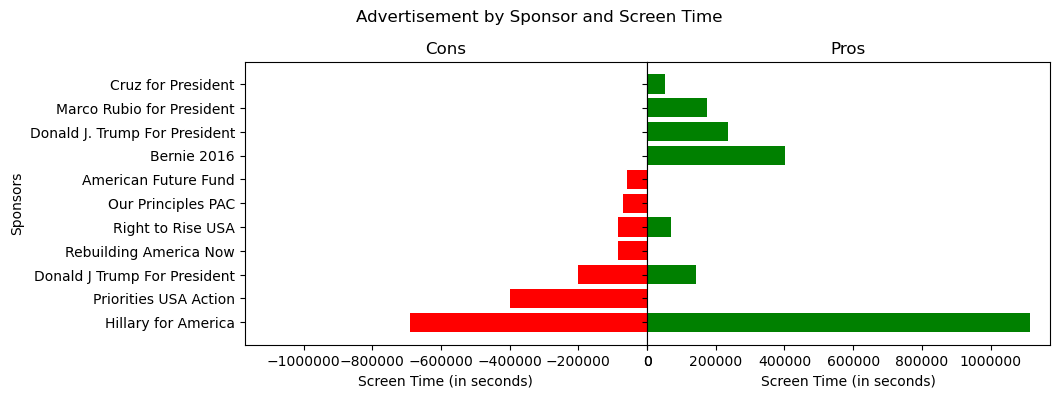

In [22]:
fig, ax = plt.subplots(1,2, figsize = (10.5,4), sharey = True, gridspec_kw = {'wspace': 0})

ax[0].barh(sponsors_min_cons['sponsors'], -sponsors_min_cons['cons'], label='cons', color = 'red')
ax[1].barh(sponsors_min_pros['sponsors'], sponsors_min_pros['pros'], label='pros', color = 'green')

fig.tight_layout()
fig.suptitle('Advertisement by Sponsor and Screen Time')
fig.subplots_adjust(top=0.85)
ax[0].set_title('Cons')
ax[1].set_title('Pros')
ax[0].set_xlabel('Screen Time (in seconds)')
ax[1].set_xlabel('Screen Time (in seconds)')
ax[0].set_ylabel('Sponsors')
ax[0].set_xlim(-sponsors_min_pros['pros'].max()*1.05, 0)
ax[1].set_xlim(0, sponsors_min_pros['pros'].max()*1.05)
ax[0].ticklabel_format(style='plain', axis='x')
ax[1].ticklabel_format(style='plain', axis='x')
plt.show()

### 1-2 By time (in minutes) and sponsor type

In [23]:
sponsor_types_min_pros=pd.DataFrame(sponsor_types_pros.groupby('sponsor_types')['air_secs'].sum()).reset_index().sort_values('air_secs',ascending=False)
sponsor_types_min_pros.columns = ['sponsor_types', 'pros']
sponsor_types_min_cons=pd.DataFrame(sponsor_types_cons.groupby('sponsor_types')['air_secs'].sum()).reset_index().sort_values('air_secs',ascending=False)
sponsor_types_min_cons.columns = ['sponsor_types', 'cons']

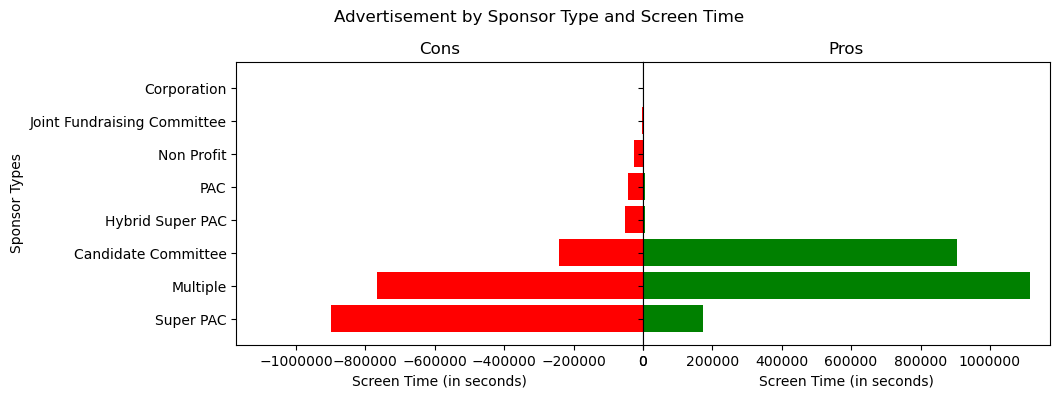

In [24]:
fig, ax = plt.subplots(1,2, figsize = (10.5,4), sharey = True, gridspec_kw = {'wspace': 0})

ax[0].barh(sponsor_types_min_cons['sponsor_types'], -sponsor_types_min_cons['cons'], label='cons', color = 'red')
ax[1].barh(sponsor_types_min_pros['sponsor_types'], sponsor_types_min_pros['pros'], label='pros', color = 'green')

fig.tight_layout()
fig.suptitle('Advertisement by Sponsor Type and Screen Time')
fig.subplots_adjust(top=0.85)
ax[0].set_title('Cons')
ax[1].set_title('Pros')
ax[0].set_xlabel('Screen Time (in seconds)')
ax[1].set_xlabel('Screen Time (in seconds)')
ax[0].set_ylabel('Sponsor Types')
ax[0].set_xlim(-sponsor_types_min_pros['pros'].max()*1.05, 0)
ax[1].set_xlim(0, sponsor_types_min_pros['pros'].max()*1.05)
ax[0].ticklabel_format(style='plain', axis='x')
ax[1].ticklabel_format(style='plain', axis='x')
plt.show()

### 2-1 By number of airing times and sponsor

In [25]:
sponsors_num_pros=pd.DataFrame(sponsors_pros.groupby('sponsors')['message'].count()).reset_index().sort_values('message',ascending=False).head(7)
sponsors_num_pros.columns = ['sponsors', 'pros']
sponsors_num_cons=pd.DataFrame(sponsors_cons.groupby('sponsors')['message'].count()).reset_index().sort_values('message',ascending=False).head(7)
sponsors_num_cons.columns = ['sponsors', 'cons']

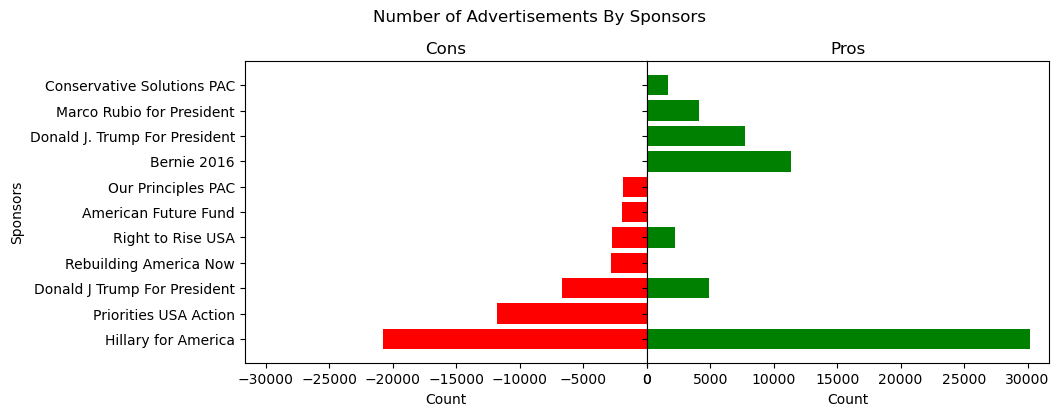

In [26]:
fig, ax = plt.subplots(1,2, figsize = (10.5, 4), sharey = True, gridspec_kw = {'wspace': 0})

ax[0].barh(sponsors_num_cons['sponsors'], -sponsors_num_cons['cons'], label='cons', color = 'red')
ax[1].barh(sponsors_num_pros['sponsors'], sponsors_num_pros['pros'], label='pros', color = 'green')

fig.tight_layout()
fig.suptitle('Number of Advertisements By Sponsors')
fig.subplots_adjust(top=0.85)
ax[0].set_title('Cons')
ax[1].set_title('Pros')
ax[0].set_xlabel('Count')
ax[1].set_xlabel('Count')
ax[0].set_ylabel('Sponsors')
ax[0].set_xlim(-sponsors_num_pros['pros'].max()*1.05, 0)
ax[1].set_xlim(0, sponsors_num_pros['pros'].max()*1.05)
ax[0].ticklabel_format(style='plain', axis='x')
ax[1].ticklabel_format(style='plain', axis='x')
plt.show()

### 2-2 By number of airing times and sponsor type

In [27]:
sponsor_types_num_pros=pd.DataFrame(sponsor_types_pros.groupby('sponsor_types')['message'].count()).reset_index().sort_values('message',ascending=False)
sponsor_types_num_pros.columns = ['sponsor_types', 'pros']
sponsor_types_num_cons=pd.DataFrame(sponsor_types_cons.groupby('sponsor_types')['message'].count()).reset_index().sort_values('message',ascending=False)
sponsor_types_num_cons.columns = ['sponsor_types', 'cons']

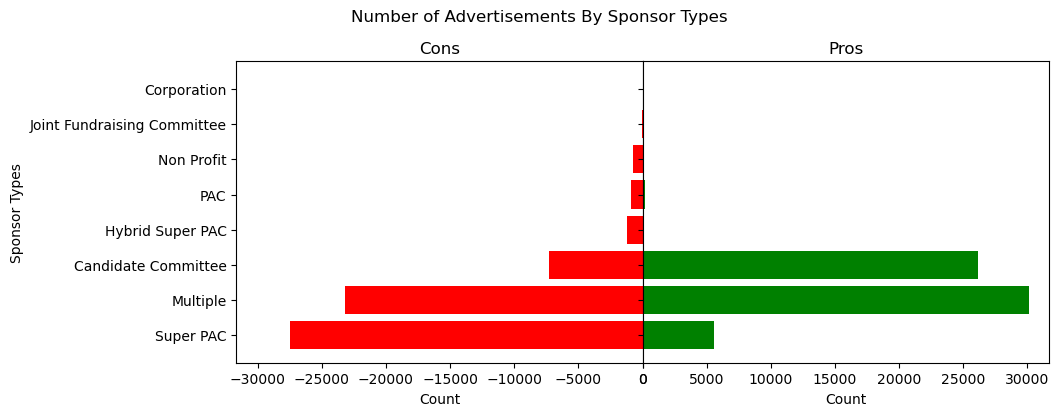

In [28]:
fig, ax = plt.subplots(1,2, figsize = (10.5, 4), sharey = True, gridspec_kw = {'wspace': 0})

ax[0].barh(sponsor_types_num_cons['sponsor_types'], -sponsor_types_num_cons['cons'], label='cons', color = 'red')
ax[1].barh(sponsor_types_num_pros['sponsor_types'], sponsor_types_num_pros['pros'], label='pros', color = 'green')

fig.tight_layout()
fig.suptitle('Number of Advertisements By Sponsor Types')
fig.subplots_adjust(top=0.85)
ax[0].set_title('Cons')
ax[1].set_title('Pros')
ax[0].set_xlabel('Count')
ax[1].set_xlabel('Count')
ax[0].set_ylabel('Sponsor Types')
ax[0].set_xlim(-sponsor_types_num_pros['pros'].max()*1.05, 0)
ax[1].set_xlim(0, sponsor_types_num_pros['pros'].max()*1.05)
ax[0].ticklabel_format(style='plain', axis='x')
ax[1].ticklabel_format(style='plain', axis='x')
plt.show()

### 2. Which `candidate` tends to get more `screen time` for con messages? 

In [29]:
only_cons = AOT[AOT['message'] == 'con']
cons_single_candidate = only_cons[~only_cons['candidates'].str.contains(',')]
cons_single_candidate = pd.DataFrame(cons_single_candidate.groupby('candidates')['air_secs'].sum()).reset_index().sort_values('air_secs', ascending=False)
cons_single_candidate['candidates'].unique()

array(['Donald Trump', 'Hillary Clinton', 'Marco Rubio', 'Ted Cruz',
       'John Kasich', 'Jeb Bush', 'Bernie Sanders'], dtype=object)

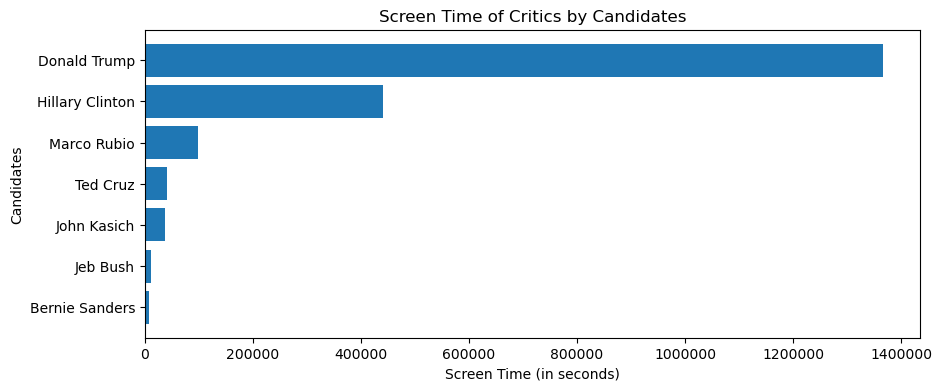

In [30]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.barh(cons_single_candidate['candidates'], cons_single_candidate['air_secs'])

ax.set_title('Screen Time of Critics by Candidates')
ax.set_ylabel('Candidates')
ax.set_xlabel('Screen Time (in seconds)')
ax.ticklabel_format(style='plain', axis='x')
ax.invert_yaxis()
plt.show()

In [31]:
Donald_Trump = only_cons[only_cons['candidates'].str.contains('Donald Trump')]
Hillary_Clinton = only_cons[only_cons['candidates'].str.contains('Hillary Clinton')]
Bernie_Sanders = only_cons[only_cons['candidates'].str.contains('Bernie Sanders')]
Marco_Rubio = only_cons[only_cons['candidates'].str.contains('Marco Rubio')]
Jeb_Bush = only_cons[only_cons['candidates'].str.contains('Jeb Bush')]
Ted_Cruz = only_cons[only_cons['candidates'].str.contains('Ted Cruz')]
John_Kasich = only_cons[only_cons['candidates'].str.contains('John Kasich')]

Donald_Trump['start_time'] = Donald_Trump['start_time'].dt.date
Hillary_Clinton['start_time'] = Hillary_Clinton['start_time'].dt.date
Bernie_Sanders['start_time'] = Bernie_Sanders['start_time'].dt.date
Marco_Rubio['start_time'] = Marco_Rubio['start_time'].dt.date
Jeb_Bush['start_time'] = Jeb_Bush['start_time'].dt.date
Ted_Cruz['start_time'] = Ted_Cruz['start_time'].dt.date
John_Kasich['start_time'] = John_Kasich['start_time'].dt.date

Donald_Trump = pd.DataFrame(Donald_Trump.groupby('start_time')['air_secs'].sum()).reset_index()
Hillary_Clinton = pd.DataFrame(Hillary_Clinton.groupby('start_time')['air_secs'].sum()).reset_index()
Bernie_Sanders = pd.DataFrame(Bernie_Sanders.groupby('start_time')['air_secs'].sum()).reset_index()
Marco_Rubio = pd.DataFrame(Marco_Rubio.groupby('start_time')['air_secs'].sum()).reset_index()
Jeb_Bush = pd.DataFrame(Jeb_Bush.groupby('start_time')['air_secs'].sum()).reset_index()
Ted_Cruz = pd.DataFrame(Ted_Cruz.groupby('start_time')['air_secs'].sum()).reset_index()
John_Kasich = pd.DataFrame(John_Kasich.groupby('start_time')['air_secs'].sum()).reset_index()

/var/folders/6v/6n8wfh_11jxg4d9zx6jqhzqh0000gn/T/ipykernel_22805/1488454818.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Donald_Trump['start_time'] = Donald_Trump['start_time'].dt.date
/var/folders/6v/6n8wfh_11jxg4d9zx6jqhzqh0000gn/T/ipykernel_22805/1488454818.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hillary_Clinton['start_time'] = Hillary_Clinton['start_time'].dt.date
/var/folders/6v/6n8wfh_11jxg4d9zx6jqhzqh0000gn/T/ipykernel_22805/1488454818.py:11: SettingWithCopyWarning: 
A value is tr

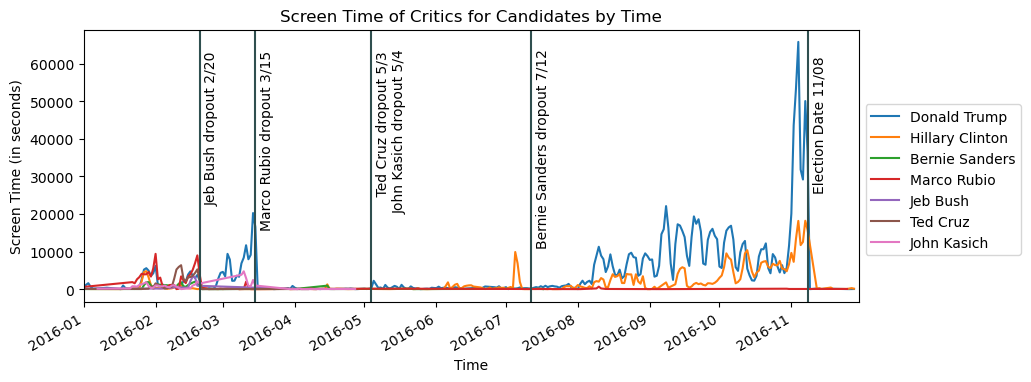

In [32]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.plot(Donald_Trump['start_time'], Donald_Trump['air_secs'], label = 'Donald Trump')
ax.plot(Hillary_Clinton['start_time'], Hillary_Clinton['air_secs'], label = 'Hillary Clinton')
ax.plot(Bernie_Sanders['start_time'], Bernie_Sanders['air_secs'], label = 'Bernie Sanders')
ax.plot(Marco_Rubio['start_time'], Marco_Rubio['air_secs'], label = 'Marco Rubio')
ax.plot(Jeb_Bush['start_time'], Jeb_Bush['air_secs'], label = 'Jeb Bush')
ax.plot(Ted_Cruz['start_time'], Ted_Cruz['air_secs'], label = 'Ted Cruz')
ax.plot(John_Kasich['start_time'], John_Kasich['air_secs'], label = 'John Kasich')

ax.set_title('Screen Time of Critics for Candidates by Time')
ax.set_ylabel('Screen Time (in seconds)')
ax.set_xlabel('Time')

plt.axvline(x=pd.to_datetime('2016-02-20'), color='darkslategrey')
plt.text(pd.to_datetime('2016-02-22'), Donald_Trump['air_secs'].max()*0.35, 'Jeb Bush dropout 2/20', rotation=90)
plt.axvline(x=pd.to_datetime('2016-03-15'), color='darkslategrey')
plt.text(pd.to_datetime('2016-03-17'), Donald_Trump['air_secs'].max()*0.25, 'Marco Rubio dropout 3/15', rotation=90)
plt.axvline(x=pd.to_datetime('2016-05-04'), color='darkslategrey')
plt.text(pd.to_datetime('2016-05-06'), Donald_Trump['air_secs'].max()*0.32, '    Ted Cruz dropout 5/3\nJohn Kasich dropout 5/4', rotation=90)
plt.axvline(x=pd.to_datetime('2016-07-12'), color='darkslategrey')
plt.text(pd.to_datetime('2016-07-14'), Donald_Trump['air_secs'].max()*0.18, 'Bernie Sanders dropout 7/12', rotation=90)
plt.axvline(x=pd.to_datetime('2016-11-08'), color='darkslategrey')
plt.text(pd.to_datetime('2016-11-10'), Donald_Trump['air_secs'].max()*0.4, 'Election Date 11/08', rotation=90)
plt.xlim(pd.to_datetime('2016/01/01'),pd.to_datetime('2016/11/30'))
fig.autofmt_xdate()
ax.legend(bbox_to_anchor=(1, 0.75))
plt.show()